In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [17]:
# Import Dataset
movie=pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [ ]:
#preprocessing

In [18]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [19]:
movie.shape

(10, 15)

In [20]:
#duplicates
movie.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool

In [22]:
#gives duplicated row
movie[movie.duplicated()]

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [25]:
#drop duplicated row
c=movie.drop_duplicates()

In [26]:
c.shape

(7, 15)

In [27]:
movie2=c.iloc[:,5:]
movie2


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


array([[<AxesSubplot:title={'center':'Sixth Sense'}>,
        <AxesSubplot:title={'center':'Gladiator'}>,
        <AxesSubplot:title={'center':'LOTR1'}>],
       [<AxesSubplot:title={'center':'Harry Potter1'}>,
        <AxesSubplot:title={'center':'Patriot'}>,
        <AxesSubplot:title={'center':'LOTR2'}>],
       [<AxesSubplot:title={'center':'Harry Potter2'}>,
        <AxesSubplot:title={'center':'LOTR'}>,
        <AxesSubplot:title={'center':'Braveheart'}>],
       [<AxesSubplot:title={'center':'Green Mile'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

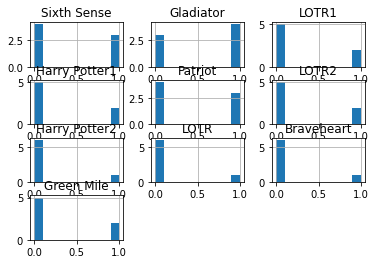

In [37]:
#visualisation
c.hist()


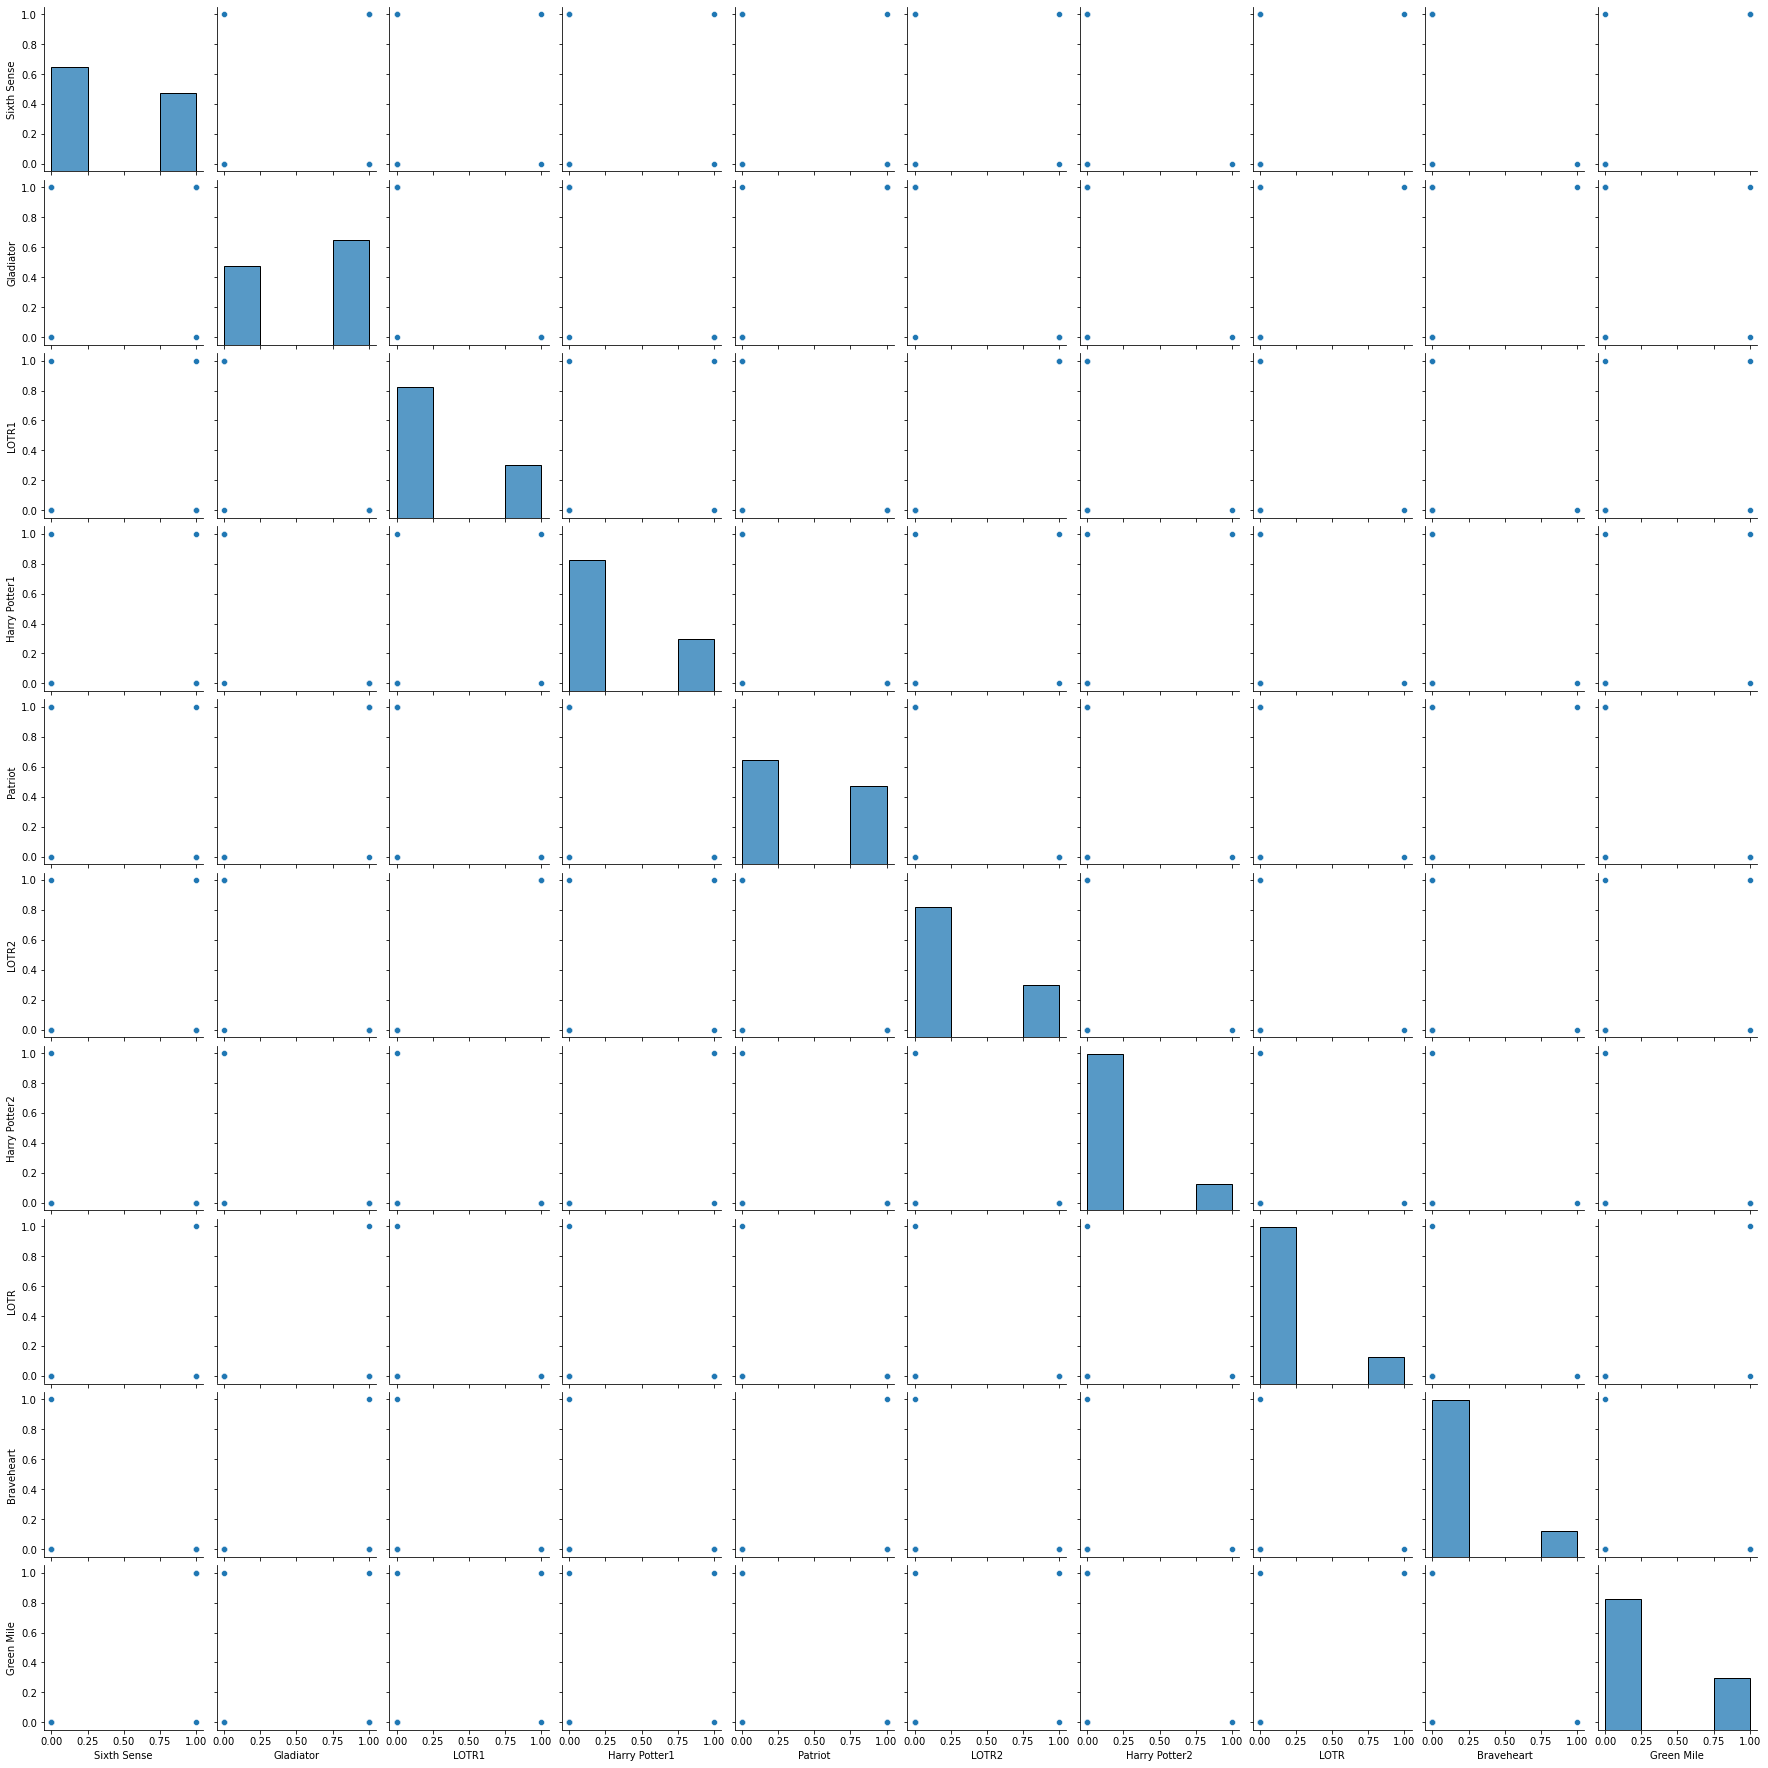

In [38]:
sns.pairplot(c)

# Apriori Algorithm

In [28]:
#1. Association rules with 10% Support and 70% confidence
# with 10% support
frequent_itemsets=apriori(movie2,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.428571,(Sixth Sense)
1,0.571429,(Gladiator)
2,0.285714,(LOTR1)
3,0.285714,(Harry Potter1)
4,0.428571,(Patriot)
5,0.285714,(LOTR2)
6,0.142857,(Harry Potter2)
7,0.142857,(LOTR)
8,0.142857,(Braveheart)
9,0.285714,(Green Mile)


In [29]:
# 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
2,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
3,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
4,(Harry Potter1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(Green Mile, LOTR2, LOTR1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
246,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR2, LOTR1)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
247,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
248,(LOTR2),"(Harry Potter1, Green Mile, LOTR1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


In [30]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
2,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
3,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
4,(Harry Potter1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(Green Mile, LOTR2, LOTR1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
246,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR2, LOTR1)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
247,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
248,(LOTR2),"(Harry Potter1, Green Mile, LOTR1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


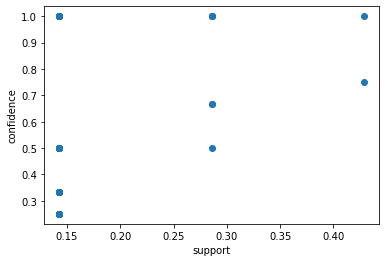

In [31]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()


In [32]:
#2. Association rules with 5% Support and 90% confidence

In [33]:
# with 5% support
frequent_itemsets2=apriori(movie2,min_support=0.05,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.428571,(Sixth Sense)
1,0.571429,(Gladiator)
2,0.285714,(LOTR1)
3,0.285714,(Harry Potter1)
4,0.428571,(Patriot)
5,0.285714,(LOTR2)
6,0.142857,(Harry Potter2)
7,0.142857,(LOTR)
8,0.142857,(Braveheart)
9,0.285714,(Green Mile)


In [34]:
# 90% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
2,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
3,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
4,(Harry Potter1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
...,...,...,...,...,...,...,...,...,...
237,(Harry Potter1),"(Green Mile, LOTR2, LOTR1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
238,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR2, LOTR1)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
239,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
240,(LOTR2),"(Harry Potter1, Green Mile, LOTR1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


In [35]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules2[rules2.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
2,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
3,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
4,(Harry Potter1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
...,...,...,...,...,...,...,...,...,...
237,(Harry Potter1),"(Green Mile, LOTR2, LOTR1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
238,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR2, LOTR1)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
239,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
240,(LOTR2),"(Harry Potter1, Green Mile, LOTR1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


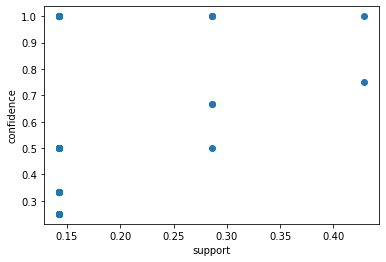

In [36]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()